In [1]:
%matplotlib ipympl
from pianoq.misc.mplc_writeup_imports import *
dir_path = r'G:\My Drive\Projects\MPLC\results\lab\2024_10_08_find_z10'

Text(0.5, 0.98, 'Signal scans (Zaber, reflected)')

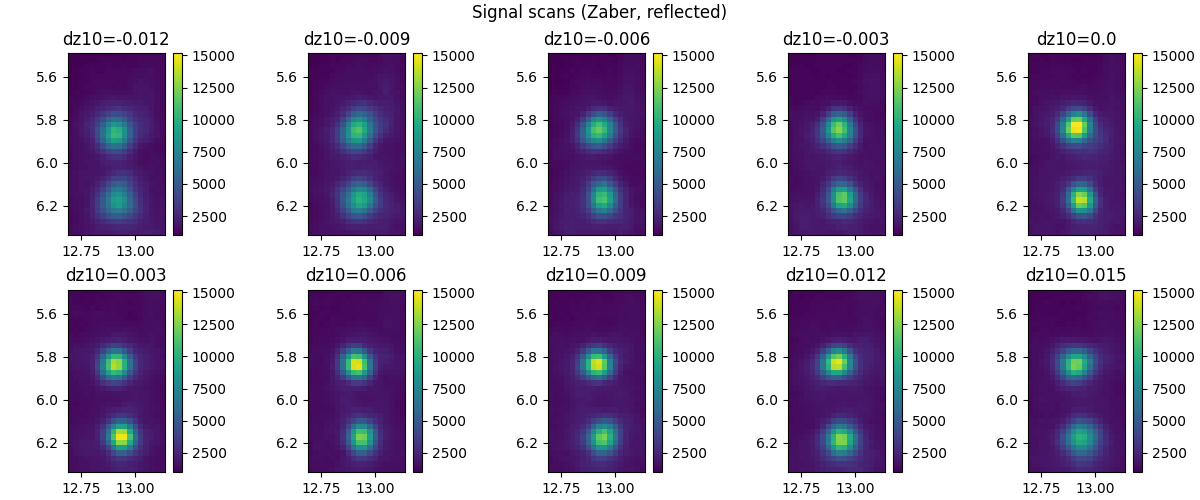

In [64]:
paths = glob.glob(rf'{dir_path}\*dz10=*.scan')[1:]
all_ds = np.array([re.findall('.*dz10=(.*).scan', path)[0] for path in paths]).astype(float)
scans = [ScanResult(path) for path in paths]

plt.close('all')
fig, axes = plt.subplots(2, 5, figsize=(12, 5), constrained_layout=True)

for i in range(len(scans)):
    ax = axes.flatten()[i]
    imm = my_mesh(scans[i].X, scans[i].Y, scans[i].single2s, ax=ax, clim=[1000, 15200])
    ax.set_title(fr'dz10={all_ds[i]}')
    # scans[i].show_singles(title=fr'dz10={all_ds[i]}', only=2)
    
fig.suptitle('Signal scans (Zaber, reflected)')

Signal detector location should be at 12.91, 5.842, then perform idler scan around corresponding spot

Text(0.5, 0.98, 'Idler scans (Thorlabs, not reflected)')

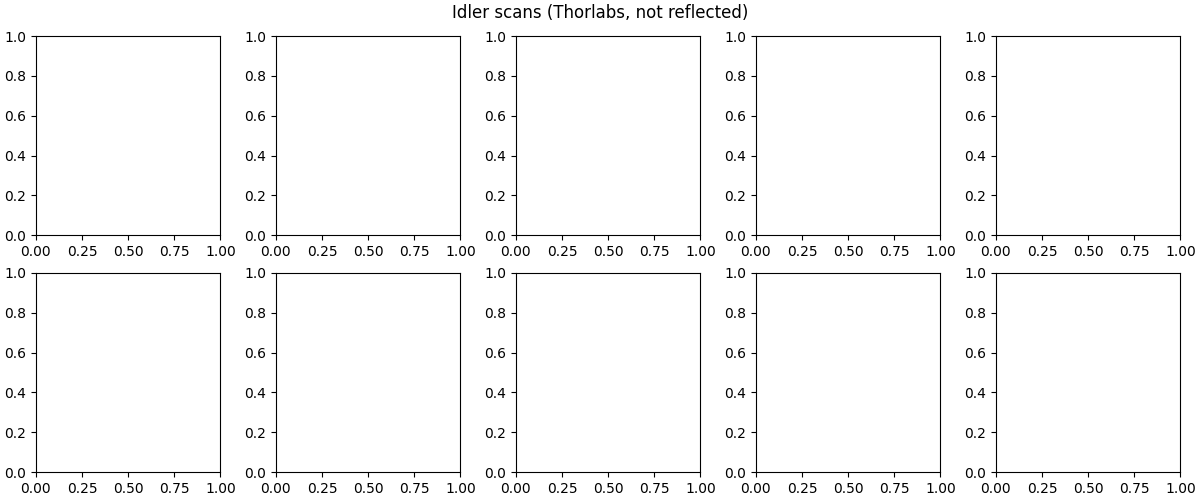

In [62]:
paths = glob.glob(rf'{dir_path}\*idler_dz10=*.scan')
all_ds = np.array([re.findall('.*dz10=(.*).scan', path)[0] for path in paths]).astype(float)
scans = [ScanResult(path) for path in paths]

fig, axes = plt.subplots(2, 5, figsize=(12, 5), constrained_layout=True)

for i in range(len(scans)):
    ax = axes.flatten()[i]
    imm = my_mesh(scans[i].X, scans[i].Y, scans[i].single2s, ax=ax, clim=[1000, 15200])
    ax.set_title(fr'dz10={all_ds[i]}')
    # scans[i].show_singles(title=fr'dz10={all_ds[i]}', only=2)
    
fig.suptitle('Idler scans (Thorlabs, not reflected)')

In [ ]:
paths = glob.glob(rf'{dir_path}\*corr_dz10=*.scan')
all_ds = np.array([re.findall('.*dz10=(.*).scan', path)[0] for path in paths]).astype(float)
scans = [ScanResult(path) for path in paths]

fig, axes = plt.subplots(2, 5, figsize=(12, 5), constrained_layout=True)

for i in range(len(scans)):
    ax = axes.flatten()[i]
    imm = my_mesh(scans[i].X, scans[i].Y, scans[i].coincidences, ax=ax, clim=[1000, 15200])
    ax.set_title(fr'dz10={all_ds[i]}')
    # scans[i].show_singles(title=fr'dz10={all_ds[i]}', only=2)
    
fig.suptitle('Coincidences')